   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

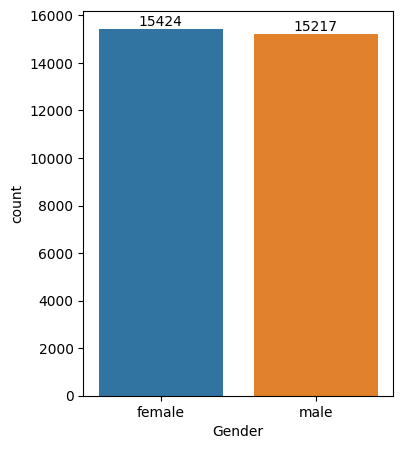

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


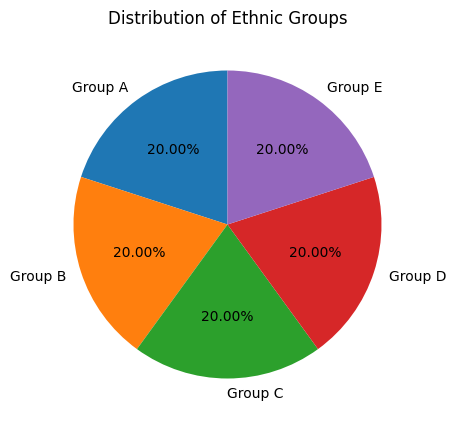

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head())


df = df.drop("Unnamed: 0", axis = 1)
print(df.head())

df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("5 - 10 ", "5 - 10 ")
df.head()

plt.figure(figsize= (4,5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.show()

gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)
# Check for NaN or zero counts in each group
groupA = df.loc[(df['EthnicGroup'] == "Group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "Group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "Group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "Group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "Group E")].count()

# List of counts for the pie chart
sizes = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

# Filter out zero or NaN values
sizes = [size if not np.isnan(size) and size > 0 else 0.0001 for size in sizes]

# Labels for the pie chart
labels = ["Group A", "Group B", "Group C", "Group D", "Group E"]

# Plotting the pie chart with filtered data
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct="%1.2f%%", startangle=90)
plt.title("Distribution of Ethnic Groups")
plt.show()
